In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10

In [26]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [27]:
x_train = x_train/255
x_test = x_test/255

In [28]:
x_train.shape

(50000, 32, 32, 3)

In [29]:
x_train = x_train.reshape(50000,3072)
x_test = x_test.reshape(10000,3072)
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [30]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from keras.utils import np_utils

In [31]:
classifier = Sequential()

In [32]:
classifier.add(Dense(units=1024,activation='relu',kernel_initializer='he_uniform',input_dim=3072))

In [33]:
classifier.add(Dense(units=512,activation='selu',kernel_initializer='he_uniform'))

In [34]:
classifier.add(Dense(units=10,activation='softmax'))

In [35]:
classifier.compile(optimizer='Adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [37]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [38]:
model_history = classifier.fit(x_train, y_train, validation_split=0.33,batch_size=128, epochs=100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 1/100
262/262 [==============================] - 25s 93ms/step - loss: 2.4843 - accuracy: 0.1129 - val_loss: 2.2100 - val_accuracy: 0.1894
Epoch 2/100
262/262 [==============================] - 21s 79ms/step - loss: 2.1729 - accuracy: 0.2146 - val_loss: 2.0955 - val_accuracy: 0.2507
Epoch 3/100
262/262 [==============================] - 21s 79ms/step - loss: 2.0706 - accuracy: 0.2636 - val_loss: 2.0274 - val_accuracy: 0.2816
Epoch 4/100
262/262 [==============================] - 21s 79ms/step - loss: 2.0037 - accuracy: 0.2944 - val_loss: 1.9831 - val_accuracy: 0.3038
Epoch 5/100
262/262 [==============================] - 21s 79ms/step - loss: 1.9620 - accuracy: 0.3094 - val_loss: 1.9497 - val_accuracy: 0.3180
Epoch 6/100
262/262 [==============================] - 21s 80ms/step - loss: 1.9249 - accuracy: 0.3253 - val_loss: 1.9238 - val_accuracy: 0.3266
Epoch 7/100
262/262 [==============================] - 21s 80ms/step - loss: 1.9070 - accuracy: 0.3327 - val_loss: 1.9057 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


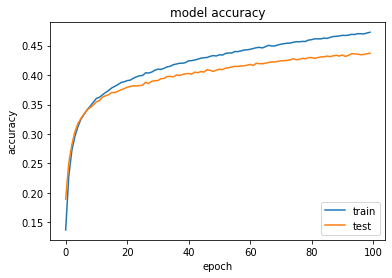

In [39]:

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

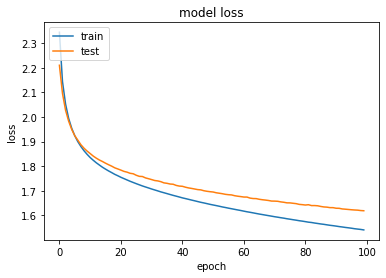

In [40]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [41]:
y_pred = classifier.predict(x_test)
y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


array([[0.03355207, 0.09704396, 0.13740566, ..., 0.00860002, 0.15002273,
        0.00502557],
       [0.0419125 , 0.14242505, 0.00310929, ..., 0.00390398, 0.21190701,
        0.5826421 ],
       [0.17176925, 0.11982212, 0.0088467 , ..., 0.00852877, 0.5282521 ,
        0.13680561],
       ...,
       [0.00783179, 0.0049063 , 0.1326428 , ..., 0.04836635, 0.01545939,
        0.00627922],
       [0.02354556, 0.06133815, 0.09863335, ..., 0.03487202, 0.01629338,
        0.03110141],
       [0.05563897, 0.01554137, 0.11596117, ..., 0.37278032, 0.05029262,
        0.02619815]], dtype=float32)

In [42]:
prediction_score = classifier.evaluate(x_test, y_test, verbose=0)

print('Test Loss and Test Accuracy', prediction_score)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Test Loss and Test Accuracy [1.5951577425003052, 0.44359999895095825]
